In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\Maysv_hab.rds')

In [3]:
df = result[None]
df['Habitat'].value_counts()
# 1) NonWet_Open
# 2) NonWetland
# 3) PFO
# 4) Water(R5UB)

1.0    36
3.0    25
2.0    17
4.0     2
Name: Habitat, dtype: int64

In [4]:
df['Wetland'] = np.where(np.logical_or(df['Habitat']==1.0, df['Habitat']==2.0), 0, 1)
df['Wetland'].value_counts()

0    53
1    27
Name: Wetland, dtype: int64

<AxesSubplot:>

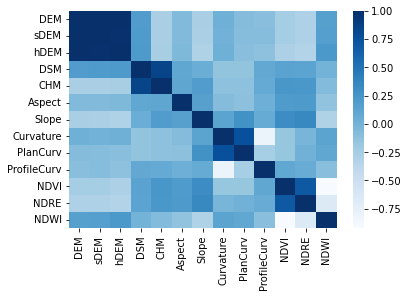

In [5]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [6]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
sDEM,-0.515601
DEM,-0.514777
hDEM,-0.475156
PlanCurv,-0.165392
Curvature,-0.113474
NDWI,-0.005584
ProfileCurv,0.021718
NDRE,0.054116
Aspect,0.061460
DSM,0.073732


In [7]:
df.to_csv("Maysv.csv")